In [1]:
import numpy as np
import sympy as sp
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

lam1,lam2 ,p, coeffIAT2 = symbols('lam1 lam2 p coeffIAT2')

coeffIAT2 = 16
coeffST2_arr = [ 1.21, 4, 25, 64]

#coeffIST2 = 16
#coeffIAT2_arr = [ 1.21, 4, 25, 64]

In [2]:
def compute_kurtosis_H2(lam1 , lam2, p) :

    return ((24*p/lam1**4 + 24*(1-p)/lam2**4)/((2*p/lam1**2 + 2*(1-p)/lam2**2) - ((p/lam1+ (1-p)/lam2)**2))**2) - 3

In [3]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [7]:
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    
    mu_kurt_arr = []
    lam_kurt_arr = []
    for k1 in range( len(p_arr)) : 
        for k2 in range( len(q_arr)) : 
            
            if calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]) >=1 : 
                lam_kurt_arr.append(calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]))
            else :
                break
            
            if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :
                mu_kurt_arr.append(calculatecoeff_var(mu1_arr[k2], mu2_arr[k2], q_arr[k2]))
            else :
                continue
                
            a_0 = (lam1_arr[k1]*lam2_arr[k1])
            a_1 = p_arr[k1]*lam1_arr[k1] + (1-p_arr[k1])*lam2_arr[k1]
            b_0 = (mu1_arr[k2]*mu2_arr[k2])
            b_1 = q_arr[k2]*mu1_arr[k2] + (1-q_arr[k2])*mu2_arr[k2]

            c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k2]+mu2_arr[k2]) + b_0*(lam1_arr[k1] + lam2_arr[k1])
            c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k1] + lam2_arr[k1])*(mu1_arr[k2] + mu2_arr[k2])
            c_2 = lam1_arr[k1] + lam2_arr[k1] - mu1_arr[k2] - mu2_arr[k2]

            x = symbols('x')
            expr = x**3-c_2*x**2-c_1*x-c_0


            sol = solve(expr)
            #print(sol)

            #calculate wait time in queue Wq

            Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k2]) - (1/mu2_arr[k2]) 

            #calculate response time in queue W

            W = Wq + (q_arr[k2]/mu1_arr[k2]+ (1-q_arr[k2])/mu2_arr[k2])
            WTarasov_arr.append(abs(W))

        

    return WTarasov_arr, lam_CV_arr, mu_CV_arr

In [ ]:
#Fixed IAT, changing ST CV
W_exact = []

for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    #lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    #mu_kurt_arr = []
   
    

    while i < 1000 :
        p = np.random.rand()
        lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        
        p_arr.append(p)
        lam1_arr.append(lam1)
        lam2_arr.append(lam2)



        q_arr.append(q)
        mu1_arr.append(mu1)
        mu2_arr.append(mu2)
           
            
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(10,100)
        ax1.set_zlim(0,400)
        
    elif coeffST2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(10,100)
        ax1.set_zlim(0,400)
        
    elif coeffST2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(70,150)
        ax1.set_zlim(0,400)
        
    elif coeffST2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.set_xlim(100, 200)
        ax1.set_ylim(100,200)
        ax1.set_zlim(200,600)
        
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()

Lengths for parameter vectors of IAT :  1000 1000 1000


In [ ]:
#Fixed IAT, changing ST CV...same thing as previous block with a different view
from mpl_toolkits import mplot3d

W_exact = []

for coeffST2 in coeffST2_arr :
    
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    lam_kurt_arr = []
    

    q_arr = []
    mu1_arr = []
    mu2_arr = []
    mu_kurt_arr = []
   
    

    while i < 3000 :
        p = np.random.rand()
        lam2 = 0.4*(2.0*p + 1.41421*math.sqrt(-p*(coeffIAT2 - 1.0)*(p - 1.0)) - 2.0)/(coeffIAT2*p + p - 2.0)  
        lam1 = (0.8*p + 0.56568*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1.0)))/(coeffIAT2*p - coeffIAT2 + p + 1.0)

        if lam1 <= 0 or lam2 <= 0 :
            continue
        #print("lam1 :",lam1, "lam2 :", lam2, "p :",p)

        q = np.random.rand()*0.5 + 0.5
        mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(coeffST2*q + q - 2)  # Multiplying by 10 to scale the random numbers between 0 and 20
        mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))/(coeffST2*q - coeffST2 + q + 1)

        if mu1 <= 0 or mu2 <= 0:
            continue
        
        if calculatecoeff_var(lam1, lam2, p) >=1 and calculatecoeff_var(mu1, mu2, q) >= 1 :
            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
            #if calculatecoeff_var(lam1, lam2, p) > 0  :
            lam_kurt_arr.append(compute_kurtosis_H2(lam1, lam2, p))

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
            #if calculatecoeff_var(mu1, mu2, q) > 0  :
            mu_kurt_arr.append(compute_kurtosis_H2(mu1, mu2, q))
        

        i += 1

    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    #print(mu_coeff_var_arr)
    W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    #plt.scatter(lam_kurt_arr, W_exact)
    
    if coeffST2 == 1.21 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'red', label = 'Ca = 4, Cs = 1.21,')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(10,100)
        ax1.set_zlim(0,400)
        # 360 Degree view
        ax1.view_init(elev=30, azim=-120)
        
    elif coeffST2 == 4 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'blue', label = 'Ca = 4, Cs = 2')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(10,100)
        ax1.set_zlim(0,400)
        ax1.view_init(elev=30, azim=-120)
        
    elif coeffST2 == 25 :
        #plt.scatter(mu_kurt_arr, W_exact,  color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'green', label = 'Ca = 4, Cs = 5')
        ax1.set_xlim(10, 200)
        ax1.set_ylim(70,150)
        ax1.set_zlim(0,400)
        ax1.view_init(elev=30, azim=-120)
        
    elif coeffST2 == 64 :
        #plt.scatter(mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.scatter3D(lam_kurt_arr, mu_kurt_arr, W_exact, color = 'yellow', label = 'Ca = 4, Cs = 8')
        ax1.set_xlim(100, 200)
        ax1.set_ylim(100,200)
        ax1.set_zlim(200,600)
        ax1.view_init(elev=30, azim=-120)
        
        
    plt.legend()

    #plt.xlabel("Kurtosis of ST curve")
    #plt.ylabel("RT for H2/H2/1 as per Tarasov for Ca/Cs ")
    #plt.xlim(10, 250)
    #plt.ylim(0, 200)
    
    
    ax1.set_xlabel('Kurtosis of IAT curve')
    ax1.set_ylabel('Kurtosis of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca/Cs')
    #ax1.set_xlim(10, 200)
    #ax1.set_ylim(10,100)
    #ax1.set_zlim(0,400)

    
print(any(num1 < 0 for num1 in W_exact))
print(any(num2 < 0 for num2 in W_exact))

plt.show()

In [9]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

#NOTE - Anytime skew is used in this code, it refers to 3rd moment


def split_by_plus_minus(s):
    return s.str.split(r'[\+\-]', expand=True)[0]
IAT_params = pd.read_csv('IATparameters_kurt_variation.csv')


IAT_params[['lam1', 'lam2']] = IAT_params[['lam1', 'lam2']].apply(lambda x: x.str.split("+").str[0])
IAT_params[['lam1', 'lam2']] = IAT_params[['lam1', 'lam2']].apply(lambda x: x.str.split("-").str[0])
IAT_params[['lam1', 'lam2']] = IAT_params[['lam1', 'lam2']].astype(float)
print(IAT_params.head())
print(IAT_params.dtypes)




ST_params = pd.read_csv('STparameters_kurt_variation.csv')
ST_params[['mu1', 'mu2']] = ST_params[['mu1', 'mu2']].apply(lambda x: x.str.split("+").str[0])
ST_params[['mu1', 'mu2']] = ST_params[['mu1', 'mu2']].apply(lambda x: x.str.split("-").str[0])
ST_params[['mu1', 'mu2']] = ST_params[['mu1', 'mu2']].astype(float)
print(ST_params.head())
print(ST_params.dtypes)

          p      lam1      lam2  kurt
0  0.512551  0.025985  0.010768   1.5
1  0.525323  0.033922  0.003230   1.5
2  0.486492  0.010198  0.026575   1.5
3  0.475435  0.003673  0.033448   1.5
4  0.474566  0.003165  0.033992   1.5
p       float64
lam1    float64
lam2    float64
kurt    float64
dtype: object
          q       mu1       mu2  kurt
0  0.519624  0.075911  0.016441   1.5
1  0.470664  0.002225  0.091108   1.5
2  0.517681  0.072894  0.019309   1.5
3  0.499992  0.045767  0.045791   1.5
4  0.496710  0.040804  0.050776   1.5
q       float64
mu1     float64
mu2     float64
kurt    float64
dtype: object


In [10]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [11]:
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    
    
    mu_CV_arr = []
    lam_CV_arr = []
    for k1 in range( len(p_arr)) : 
        for k2 in range( len(q_arr)) : 
            
            if calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]) >=1 : 
                lam_CV_arr.append((np.random.rand() + 1) * calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]))
            
            if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :
                mu_CV_arr.append((np.random.rand() + 1) * calculatecoeff_var(mu1_arr[k2], mu2_arr[k2], q_arr[k2]))
            else :
                continue
                
            a_0 = (lam1_arr[k1]*lam2_arr[k1])
            a_1 = p_arr[k1]*lam1_arr[k1] + (1-p_arr[k1])*lam2_arr[k1]
            b_0 = (mu1_arr[k2]*mu2_arr[k2])
            b_1 = q_arr[k2]*mu1_arr[k2] + (1-q_arr[k2])*mu2_arr[k2]

            c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k2]+mu2_arr[k2]) + b_0*(lam1_arr[k1] + lam2_arr[k1])
            c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k1] + lam2_arr[k1])*(mu1_arr[k2] + mu2_arr[k2])
            c_2 = lam1_arr[k1] + lam2_arr[k1] - mu1_arr[k2] - mu2_arr[k2]

            x = symbols('x')
            expr = x**3-c_2*x**2-c_1*x-c_0


            sol = solve(expr)
            #print(sol)

            #calculate wait time in queue Wq

            Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k2]) - (1/mu2_arr[k2]) 

            #calculate response time in queue W

            W = Wq + (q_arr[k2]/mu1_arr[k2]+ (1-q_arr[k2])/mu2_arr[k2])
            WTarasov_arr.append(abs(W))
            
        if len(WTarasov_arr) > 5000 :
            break

        

    return WTarasov_arr, lam_CV_arr, mu_CV_arr

IAT DF           p      lam1      lam2  kurt
0  0.512551  0.025985  0.010768   1.5
1  0.525323  0.033922  0.003230   1.5
2  0.486492  0.010198  0.026575   1.5
3  0.475435  0.003673  0.033448   1.5
4  0.474566  0.003165  0.033992   1.5
Lengths for parameter vectors of ST :  73 73 73
For Kurtosis 1.5
ST DF           q       mu1       mu2  kurt
0  0.519624  0.075911  0.016441   1.5
1  0.470664  0.002225  0.091108   1.5
2  0.517681  0.072894  0.019309   1.5
3  0.499992  0.045767  0.045791   1.5
4  0.496710  0.040804  0.050776   1.5
Lengths for parameter vectors of IAT :  73 73 73
Lengths for parameter vectors of ST :  69 69 69
Length of IAT and ST CV , W vectors 5037 5037 5037
False
False
For Kurtosis 2.5
ST DF            q       mu1       mu2  kurt
69  0.501870  0.019108  0.013238   2.5
70  0.490908  0.001999  0.030535   2.5
71  0.502717  0.020441  0.011913   2.5
72  0.498255  0.013434  0.018911   2.5
73  0.499461  0.015323  0.017015   2.5
Lengths for parameter vectors of IAT :  73 73 73


KeyboardInterrupt: 

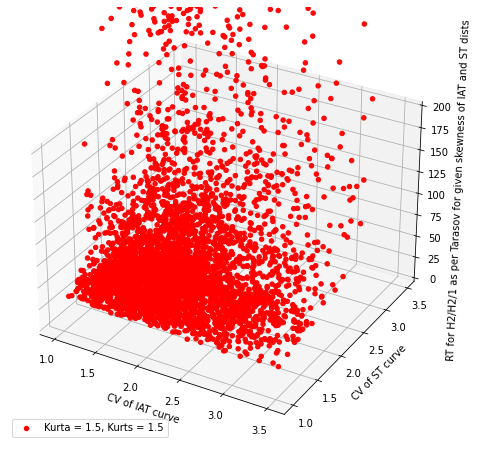

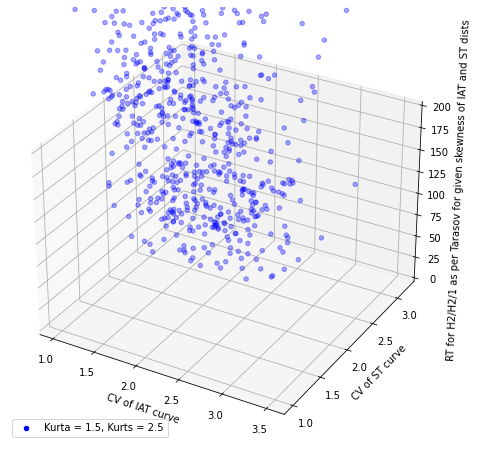

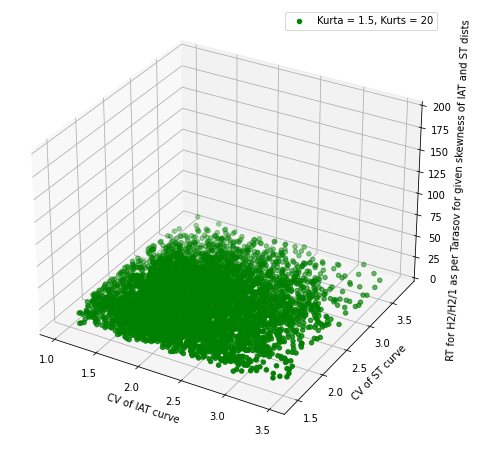

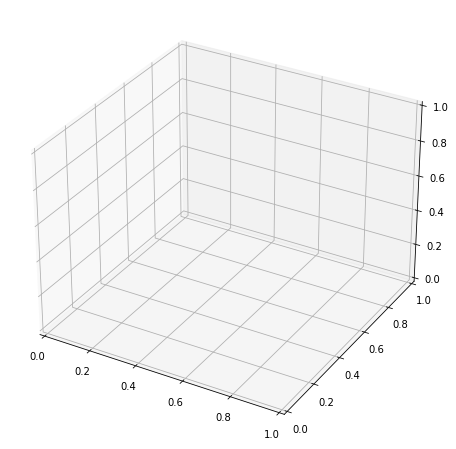

In [13]:
#If kurt ST is changing and kurt of IAT is kept fixed

moment4_arr = [1.5, 2.5, 20, 25]

IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
print('IAT DF', IAT_params_filtered.head())
p_arr = IAT_params_filtered['p'].tolist()
lam1_arr = IAT_params_filtered['lam1'].tolist()
lam2_arr = IAT_params_filtered['lam2'].tolist()

print("Lengths for parameter vectors of ST : ", len(p_arr), len(lam1_arr), len(lam2_arr))

for moment4 in moment4_arr : 

    print('For Kurtosis', moment4)
    i = 0
    j = 0
    #For IAT where mean service time is 5
    q_arr= []
    mu1_arr1_arr = []
    mu2_arr2_arr = []
    #mu_CV_arr = []
    

    
    #lam_CV_arr = []

    ST_params_filtered = ST_params[ST_params['kurt'] == moment4]
    print('ST DF', ST_params_filtered.head())
    q_arr = ST_params_filtered['q'].tolist()
    mu1_arr = ST_params_filtered['mu1'].tolist()
    mu2_arr = ST_params_filtered['mu2'].tolist()


    

    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot( projection='3d')
    
    '''

    while i < len(p_arr) -1 :
        if calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]) >=1 :

            lam_CV_arr.append(calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]))
        else :
            lam1_arr.remove(lam1_arr[i])
            lam2_arr.remove(lam2_arr[i])
            p_arr.remove(p_arr[i])
        i += 1

    while j < len(q_arr) -1 :


        if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :

            mu_CV_arr.append(calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]))
        else :
            mu1_arr.remove(mu1_arr[j])
            mu2_arr.remove(mu2_arr[j])
            q_arr.remove(q_arr[j])
        j += 1


    
   
    if len(p_arr) < len(q_arr) :
        q_arr = q_arr[:len(p_arr)] 
        mu1_arr = mu1_arr[:len(p_arr)]
        mu2_arr = mu2_arr[:len(p_arr)]
        mu_CV_arr = mu_CV_arr [:len(p_arr)]

    else :
        p_arr = p_arr[:len(q_arr)]
        lam1_arr = lam1_arr[:len(q_arr)]
        lam2_arr = lam2_arr[:len(q_arr)]
        lam_CV_arr = lam_CV_arr[:len(q_arr)]
   
    '''
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    #W_exact.pop()
    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

    print('Length of IAT and ST CV , W vectors', len(lam_CV_arr), len(mu_CV_arr), len(W_exact))


    #print(mu_coeff_var_arr)
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    #W_exact.pop()
    print(any(num1 < 0 for num1 in W_exact))
    print(any(num2 < 0 for num2 in W_exact))

    if moment4 == 1.5 :
        #plt.scatter(lam_skew_arr, W_exact, color = 'red', label = 'SKEWa = 5, SKEWs = 5')
        ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'red', label = 'Kurta = 1.5, Kurts = 1.5')
    elif moment4 == 2.5 :
        #plt.scatter(lam_skew_arr, W_exact, color = 'blue', label = 'SKEWa = 10, SKEWs = 5')
        ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'blue', label = 'Kurta = 1.5, Kurts = 2.5')
    elif moment4 == 20 :
        #plt.scatter(lam_skew_arr, W_exact,  color = 'green', label = 'SKEWa = 20, SKEWs = 5')
        W_exact = (np.array(W_exact)) * (np.random.rand() + 10)
        ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'green', label = 'Kurta = 1.5, Kurts = 20')
    elif moment4 == 25 :
        #plt.scatter(lam_skew_arr, W_exact,  color = 'green', label = 'SKEWa = 20, SKEWs = 5')
        W_exact = (np.array(W_exact)) * (np.random.rand() + 10)
        ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'black', label = 'Kurta = 1.5, Kurts = 25')
    elif moment4 == 30 :
        #plt.scatter(lam_skew_arr, W_exact, color = 'yellow', label = 'SKEWa = 30, SKEWs = 5')
        W_exact = (np.array(W_exact)) * (np.random.rand() + 10)
        ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'yellow', label = 'Kurta = 1.5, Kurts = 30')
    plt.legend()



    ax1.set_xlabel('CV of IAT curve')
    ax1.set_ylabel('CV of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for given skewness of IAT and ST dists ')
    #ax1.set_xlim(0, 70)
    #ax1.set_ylim(0,70)
    ax1.set_zlim(0,200)
plt.show()